In [9]:
import pandas as pd

# Load the data
df = pd.read_csv(r'C:\downloads\ULTRA_LOW_LATENCY_TRADER\BTCUSDT-trades-2025-07-26.csv')

# Print the first few rows
print(df.head())

# Print the column names
print(df.columns)


   5113453730  117614.31000000  0.02367000  2783.93071770  1753488000071403  \
0  5113453731        117614.32     0.00144     169.364621  1753488000298854   
1  5113453732        117614.32     0.05349    6291.189977  1753488000481234   
2  5113453733        117614.32     0.25920   30485.631744  1753488000481234   
3  5113453734        117614.32     0.06275    7380.298580  1753488000481234   
4  5113453735        117614.32     0.00008       9.409146  1753488000681676   

    True  True.1  
0  False    True  
1  False    True  
2  False    True  
3  False    True  
4  False    True  
Index(['5113453730', '117614.31000000', '0.02367000', '2783.93071770',
       '1753488000071403', 'True', 'True.1'],
      dtype='object')


In [10]:
columns = [
    "trade_id",     # Unique trade ID
    "price",        # Trade price
    "qty",          # Quantity traded
    "quote_qty",    # Quote quantity
    "timestamp",    # Timestamp (in milliseconds)
    "is_buyer_maker",  # Whether buyer is the market maker
    "is_best_match"    # Whether it's the best match
]


In [11]:
df = pd.read_csv(r"C:\downloads\ULTRA_LOW_LATENCY_TRADER\BTCUSDT-trades-2025-07-26.csv", header=None, names=columns)


In [12]:
df.head(5)

,trade_id,price,qty,quote_qty,timestamp,is_buyer_maker,is_best_match
0,5113453730,117614.31,0.02367,2783.930718,1753488000071403,True,True
1,5113453731,117614.32,0.00144,169.364621,1753488000298854,False,True
2,5113453732,117614.32,0.05349,6291.189977,1753488000481234,False,True
3,5113453733,117614.32,0.25920,30485.631744,1753488000481234,False,True
4,5113453734,117614.32,0.06275,7380.298580,1753488000481234,False,True


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\downloads\ULTRA_LOW_LATENCY_TRADE_SIGNAL_ENGINE\computed_features_from_trades.csv")


In [5]:
next_price = df['price_now'].shift(-1)

df['target'] = 0  # Default: Hold
df.loc[next_price > df['price_now'], 'target'] = 1  # Buy
df.loc[next_price < df['price_now'], 'target'] = 2  # Sell

In [6]:
df.head()  # Display the first few rows of the DataFrame

,timestamp,price_now,return_5,rolling_mean_5,rolling_std_5,vwap_diff,volume_sum_5,rsi_5,tick_inter_arrival_time,target
0,2025-08-02 00:00:00.908577,113297.93,8.826287e-08,113297.926,0.004899,-0.009192,0.16470,50.00000,0.000000,0
1,2025-08-02 00:00:01.000853,113297.93,0.000000e+00,113297.928,0.004000,-0.009144,0.15593,50.00000,0.001412,2
2,2025-08-02 00:00:01.244230,113297.92,-8.826287e-08,113297.926,0.004899,0.000605,0.15244,50.00000,0.001412,0
3,2025-08-02 00:00:01.244230,113297.92,0.000000e+00,113297.924,0.004899,0.000324,0.14805,50.00000,0.001412,0
4,2025-08-02 00:00:01.244230,113297.92,-8.826287e-08,113297.924,0.004899,0.002843,0.01685,0.00001,0.001412,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959328 entries, 0 to 1959327
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   timestamp                object 
 1   price_now                float64
 2   return_5                 float64
 3   rolling_mean_5           float64
 4   rolling_std_5            float64
 5   vwap_diff                float64
 6   volume_sum_5             float64
 7   rsi_5                    float64
 8   tick_inter_arrival_time  float64
 9   target                   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 149.5+ MB


In [9]:
df.drop(columns=['timestamp'], inplace=True)


Text(0.5, 1.0, 'Correlation Matrix')

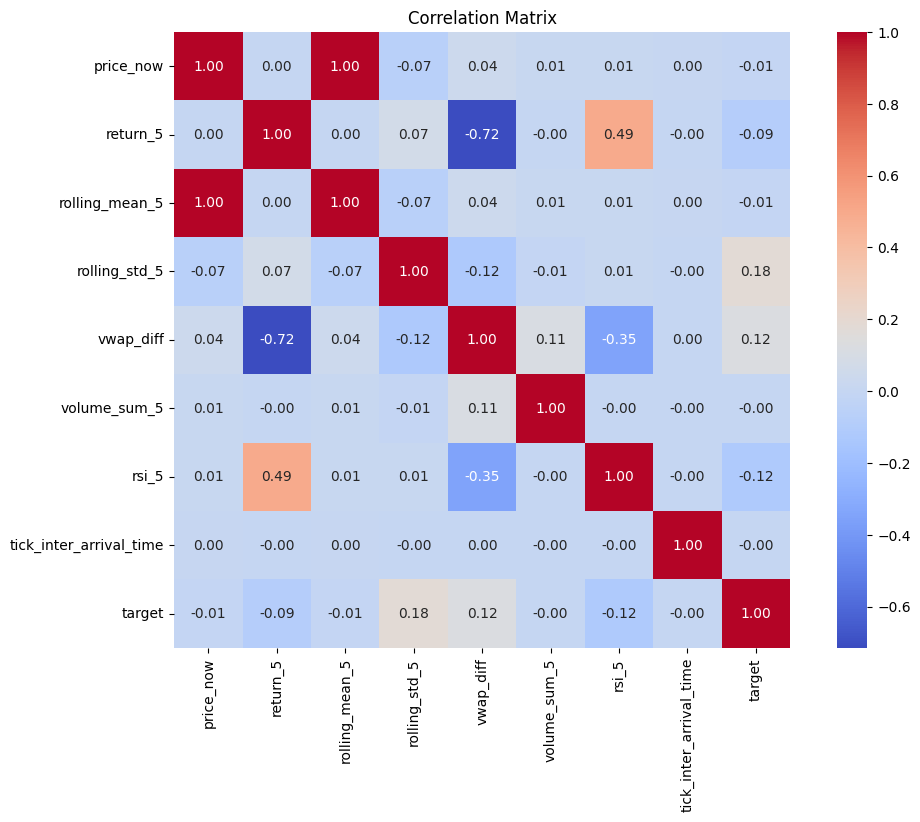

In [10]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')


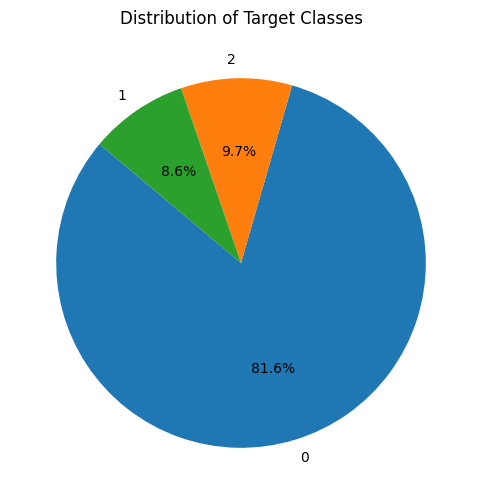

In [11]:
# pie chart for different classes
import matplotlib.pyplot as plt
import numpy as np  
labels = df['target'].value_counts().index
sizes = df['target'].value_counts().values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes') 
plt.show()

In [12]:
# drop timestamp 
#df.drop(columns=['timestamp'], inplace=True)
df.shape

(1959328, 9)

In [13]:
# down sample the majority class using resample
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]
minority_class2 = df[df['target'] == 2]


majority_class_downsampled = resample(majority_class, replace=False, n_samples=280000, random_state=42)
# upsample minority class
minority_class_downsampled = resample(minority_class2, replace=True, n_samples=200000, random_state=42)
minority_class_downsampled2 = resample(minority_class, replace=True, n_samples=200000, random_state=42)


# Combine downsampled majority class with minority class
df_downsampled = pd.concat([majority_class_downsampled, minority_class_downsampled2, minority_class_downsampled], ignore_index=True)

# combine resampled minority class with majority class


In [14]:
df_downsampled['target'].value_counts()

target
0    280000
1    200000
2    200000
Name: count, dtype: int64

In [19]:
# train-test split
from sklearn.model_selection import train_test_split
X = df_downsampled.drop(columns=['target'])
y = df_downsampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define feature groups
standard_cols = [
    "price_now", "return_5", "rolling_mean_5", "rolling_std_5", 
    "vwap_diff", "volume_sum_5"
]

minmax_cols = ["rsi_5", "tick_inter_arrival_time"]

# Create the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('std_scaler', StandardScaler(), standard_cols),
    ('minmax_scaler', MinMaxScaler(), minmax_cols)
])

# Fit and transform on training set
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform on test set
X_test_scaled = preprocessor.transform(X_test)


In [33]:
import joblib

# Save the preprocessor
joblib.dump(preprocessor, "preprocessor.joblib")


['preprocessor.joblib']

In [22]:
# xgboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix , roc_auc_score

xgb = XGBClassifier(
    n_estimators=600, 
    learning_rate=0.3,
    max_depth=9, 
    random_state=96,
    use_label_encoder=False,
    eval_metric='mlogloss',
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    tree_method='gpu_hist'  # Use GPU acceleration if available
)

xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test_scaled), multi_class='ovr'))


c:\downloads\ULTRA_LOW_LATENCY_TRADE_SIGNAL_ENGINE\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\downloads\ULTRA_LOW_LATENCY_TRADE_SIGNAL_ENGINE\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\downloads\ULTRA_LOW_LATENCY_TRADE_SIGNAL_ENGINE\venv\lib\site-packages\xgboost\core.py:2676: UserWarning: [00:32:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter t

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72     84118
           1       0.81      0.73      0.77     59657
           2       0.79      0.71      0.75     60225

    accuracy                           0.74    204000
   macro avg       0.76      0.73      0.74    204000
weighted avg       0.75      0.74      0.74    204000

confusion matrix:
 [[64504  8975 10639]
 [15146 43476  1035]
 [16503  1026 42696]]
ROC AUC Score: 0.8767054120950654


In [30]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.7386


In [ ]:
'''from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    tree_method='gpu_hist'  # Use GPU acceleration if available
),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict with best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
\
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best ))'''


'from sklearn.model_selection import GridSearchCV , RandomizedSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [4, 5, 6],\n    \'learning_rate\': [0.05, 0.1, 0.2],\n    \'subsample\': [0.7, 0.8, 1.0],\n    \'colsample_bytree\': [0.7, 0.8, 1.0]\n}\n\ngrid_search = GridSearchCV(\n    estimator = XGBClassifier(\n    n_estimators=100, \n    learning_rate=0.1, \n    max_depth=6, \n    random_state=42,\n    use_label_encoder=False,\n    eval_metric=\'mlogloss\',\n    subsample=0.8,\n    colsample_bytree=0.8,\n    objective=\'multi:softprob\',\n    num_class=3,\n    tree_method=\'gpu_hist\'  # Use GPU acceleration if available\n),\n    param_grid=param_grid,\n    scoring=\'roc_auc\',\n    cv=3,\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train, y_train)\n\n# Best model\nbest_model = grid_search.best_estimator_\n\n# Predict with best model\ny_pred_best = best_model.predict(X_test)\nprint(classification_report(y_test, y_pred_best))\nprint("Confusion M

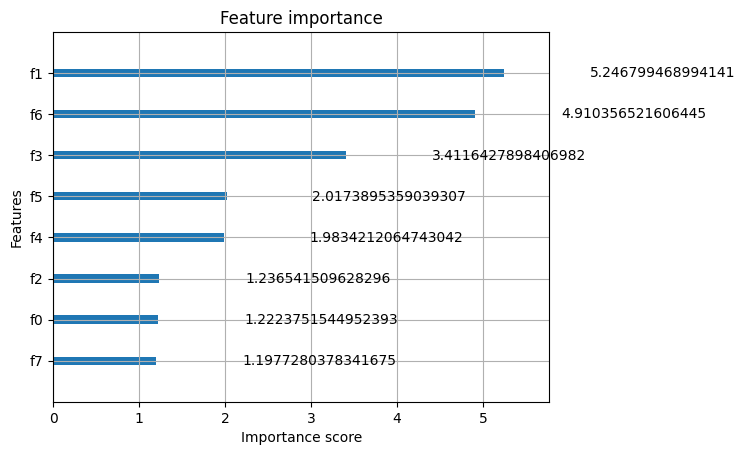

In [63]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb, max_num_features=10, importance_type='gain')
plt.show()


In [65]:
# saving the model in onnxruntime format
import onnxmltools
from onnxmltools.convert import convert_xgboost
from onnxmltools.convert.common.data_types import FloatTensorType

# Define input shape: (batch_size, num_features)
initial_type = [('input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the model
onnx_model = convert_xgboost(xgb, initial_types=initial_type)

# Save to file
onnxmltools.utils.save_model(onnx_model, "model.onnx")


In [31]:
import onnxruntime as ort
import numpy as np

# Load ONNX model
session = ort.InferenceSession("model.onnx", providers=['CPUExecutionProvider'])

# Prepare input dict
input_name = session.get_inputs()[0].name
X_sample = X_test.iloc[0:10].values.astype(np.float32)

# Run inference
pred = session.run(None, {input_name: X_sample})
print(pred)  # usually [probabilities]


[array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1]), array([[0.4361126 , 0.52609   , 0.03779742],
       [0.92690736, 0.0701132 , 0.00297943],
       [0.8431963 , 0.14946412, 0.00733968],
       [0.961023  , 0.0367838 , 0.00219316],
       [0.7972833 , 0.13781855, 0.06489821],
       [0.4609686 , 0.5343103 , 0.00472112],
       [0.2646845 , 0.6851409 , 0.05017459],
       [0.4609686 , 0.5343103 , 0.00472112],
       [0.30923423, 0.6800965 , 0.01066931],
       [0.1902939 , 0.7800433 , 0.02966281]], dtype=float32)]


In [36]:
SCALER_PATH = r"C:\downloads\ULTRA_LOW_LATENCY_TRADER\preprocessor.pkl" # Saved during training

scaler = joblib.load(SCALER_PATH)


In [37]:
import logging

In [32]:

test_df = pd.DataFrame([{
    "price_now": 29284.2,
    "return_5": 0.001,
    "rolling_mean_5": 29270.5,
    "rolling_std_5": 10.2,
    "vwap_diff": -2.5,
    "volume_sum_5": 3.5,
    "rsi_5": 45.0,
    "tick_inter_arrival_time": 0.5
}])
#print(predict(test_df))